# Moving from `datascience` to Pandas

Welcome! This notebook is an unofficial resource that serves as an introduction to working with Python's widely used Pandas library for students who have taken Introduction to Data Science. The functions introduced will be analogous to those in Berkeley's `datascience` module, with examples provided for each.

We will cover the following topics in this notebook:
1. [Basics of Pandas](#basics)
    - [Importing and Loading Packages](#import)
<br>
<br>
2. [Dataframes: Working with Tabular Data](#dataframes)
    - [Creating a Dataframe](#creating)
    - [Accessing Values in Dataframe](#accessing)
    - [Manipulating Data](#manipulating)
<br>
<br>
3. [Visualizing Data](#visualizing)
    - [Histograms](#histograms)
    - [Line Plots](#line)
    - [Scatter Plots](#scatter)
    - [Bar Plots](#bar)

## 1. Basics <a id='basics'></a>

This notebook assumes familiarity with Python concepts, syntax and data structures at the level of Data 8. For a brief refresher on some Python concepts, refer to this [Python Basics Guide on Github](https://github.com/TiesdeKok/LearnPythonforResearch/blob/master/0_python_basics.ipynb)

Python has a great ecosystem of data-centric packages which makes it excellent for data analysis. Pandas is one of those packages, and makes importing and analyzing data much easier. Pandas builds on packages like NumPy and matplotlib to give us a single, convenient, place to do most of our data analysis and visualization work.

### 1.1 Importing and Loading Packages <a id='import'></a>

Let's import the `datascience` and `numpy` packages the `import` keyword. Since we Pandas as `pd`, we need to prefix all functions with `pd`, similar to how we prefix all numpy functions with `np` (e.g. as `np.append()`).

Run the cell below.

In [30]:
from datascience import * # import the datascience package
import pandas as pd       # import the pandas library. pd is a common shorthand for pandas
import numpy as np        # import numpy for working with numbers

## 2. Dataframes: Working with Tabular Data <a id='dataframes'></a>

In Python's `datascience` module, we used `Table` to build our dataframes and used commands such as `select()`, `where()`, `group()`, `column()` etc. In this section, we will go over some basic commands to work with tabular data in Pandas

### 2.1 Creating a Dataframe <a id='creating'> </a>

Pandas introduces a data structure (i.e. dataframe) that represents data as a table with columns and rows. 

In Python's `datascience` module that is used in Introduction to Data Science, this is how we created tables from scratch by extending an empty table:

In [31]:
t = Table().with_columns([
     'letter', ['a', 'b', 'c', 'z'],
     'count',  [  9,   3,   3,   1],
     'points', [  1,   2,   2,  10],
 ])
t

letter,count,points
a,9,1
b,3,2
c,3,2
z,1,10


In Pandas, we can use the function `pd.DataFrame` to initialize a dataframe from a dictionary or a list-like object. Refer to the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) for more information.

In [32]:
# Create a dataframe from a dictionary
df_from_dict = pd.DataFrame({ 'letter' : ['a', 'b', 'c', 'z'],
                      'count' : [  9,   3,   3,   1],
                      'points' : [  1,   2,   2,  10]
                      })
df_from_dict

,letter,count,points
0,a,9,1
1,b,3,2
2,c,3,2
3,z,1,10


More often, we will need to create a dataframe by importing data from a .csv file. In `datascience`, this is how we read data from a csv:

In [33]:
datascience_baby = Table.read_table('baby.csv')
datascience_baby

Unnamed: 0,State,Sex,Year,Name,Count
0,NC,F,1910,Mary,837
1,NC,F,1910,Annie,401
2,NC,F,1910,Ruth,235
3,NC,F,1910,Ethel,199
4,NC,F,1910,Elizabeth,191
5,NC,F,1910,Margaret,171
6,NC,F,1910,Lillie,167
7,NC,F,1910,Bessie,163
8,NC,F,1910,Ruby,139
9,NC,F,1910,Sarah,139


In Pandas, we use `pd.read.csv()` to read data from a csv file. Sometimes, depending on the data file, we may need to specify the parameters `sep`, `header` or `encoding` as well. For a full list of parameters, refer to [this guide](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).

**Note:** The `.head()` method will display the rows of a data frame object.

**Reminder:** A Python **function** is a sequence of statements, given a name, that execute in a specific order. In Introduction to Data Science, we talked about built-in and user-defined functions. A Python **method** is like a function, except it is attached to an object. We call a method on an object, and it may or may not make changes to that object. A method, then, belongs to a class.

In [61]:
baby = pd.read_csv('baby.csv')
baby.head()

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False


The `.describe` method generates a set of summary statistics of the Series or Dataframe provided..

In [35]:
# View summary of data
baby.describe()

,Unnamed: 0,Year,Count
count,175577.000000,175577.000000,175577.000000
mean,87788.000000,1975.159298,51.372503
std,50684.858444,32.094226,142.605256
min,0.000000,1910.000000,5.000000
25%,43894.000000,1949.000000,7.000000
50%,87788.000000,1981.000000,13.000000
75%,131682.000000,2004.000000,36.000000
max,175576.000000,2019.000000,3883.000000


In [36]:
# Load csv from URL
sat = pd.read_csv('https://raw.githubusercontent.com/mahmoudharding/ma4112/main/ldm/sat2014.csv')
sat.head()

,Unnamed: 0,State,Participation Rate,Critical Reading,Math,Writing,Combined
0,0,North Dakota,2.3,612,620,584,1816
1,1,Illinois,4.6,599,616,587,1802
2,2,Iowa,3.1,605,611,578,1794
3,3,South Dakota,2.9,604,609,579,1792
4,4,Minnesota,5.9,598,610,578,1786


In [37]:
# View information about dataframe
print(sat.shape)          # View dimensions (rows, cols)
print(sat.columns.values) # View column names

(51, 7)
['Unnamed: 0' 'State' 'Participation Rate' 'Critical Reading' 'Math'
 'Writing' 'Combined']


### 2.2 Accessing Values in Dataframe <a id='accessing'> </a>

In `datascience`, we can use `.column()` to access values in a particular column as follows:

In [38]:
# Access column 'letter' and return an array
t.column('letter')

array(['a', 'b', 'c', 'z'], dtype='<U1')

In Pandas, columns are also known as Series. We can access a Pandas series by using the square bracket notation.

In [39]:
# Returns Series object
sat['State']

0             North Dakota
1                 Illinois
2                     Iowa
3             South Dakota
4                Minnesota
5                 Michigan
6                Wisconsin
7                 Missouri
8                  Wyoming
9                   Kansas
10                Kentucky
11                Nebraska
12                Colorado
13             Mississippi
14               Tennessee
15                Arkansas
16                Oklahoma
17                    Utah
18               Louisiana
19                    Ohio
20                 Montana
21                 Alabama
22              New Mexico
23           New Hampshire
24           Massachusetts
25                 Vermont
26                 Arizona
27                  Oregon
28                Virginia
29              New Jersey
30             Connecticut
31           West Virginia
32              Washington
33              California
34                  Alaska
35          North Carolina
36            Pennsylvania
3

If we want a numpy array of column values, we can call the method `.values` on a Series object:

In [40]:
sat['State'].values

array(['North Dakota', 'Illinois', 'Iowa', 'South Dakota', 'Minnesota',
       'Michigan', 'Wisconsin', 'Missouri', 'Wyoming', 'Kansas',
       'Kentucky', 'Nebraska', 'Colorado', 'Mississippi', 'Tennessee',
       'Arkansas', 'Oklahoma', 'Utah', 'Louisiana', 'Ohio', 'Montana',
       'Alabama', 'New Mexico', 'New Hampshire', 'Massachusetts',
       'Vermont', 'Arizona', 'Oregon', 'Virginia', 'New Jersey',
       'Connecticut', 'West Virginia', 'Washington', 'California',
       'Alaska', 'North Carolina', 'Pennsylvania', 'Rhode Island',
       'Indiana', 'Maryland', 'New York', 'Hawaii', 'Nevada', 'Florida',
       'Georgia', 'South Carolina', 'Texas', 'Maine', 'Idaho', 'Delaware',
       'District of Columbia'], dtype=object)

In `datascience`, we can use `.take()` to access a row in the Table.

In [41]:
# Select the first two rows using Python's slicing notation
t.take[0:2]

letter,count,points
a,9,1
b,3,2


In Pandas, we can access rows and column by their position using the `iloc` method. We need to specify the rows and columns we want in the following syntax: `df.iloc[<rows>, <columns>]`. For more information on indexing, refer to [this guide](https://pandas.pydata.org/pandas-docs/stable/indexing.html)

In [42]:
# Select the first two rows using iloc
baby.iloc[0:2, :] 

,Unnamed: 0,State,Sex,Year,Name,Count
0,0,NC,F,1910,Mary,837
1,1,NC,F,1910,Annie,401


In [43]:
# Specify row indices
baby.iloc[[1, 4, 6], :]

,Unnamed: 0,State,Sex,Year,Name,Count
1,1,NC,F,1910,Annie,401
4,4,NC,F,1910,Elizabeth,191
6,6,NC,F,1910,Lillie,167


We can also access a specific value in the dataframe by passing in the row and column indices.

In [44]:
# get value in second row, third column
baby.iloc[1, 2]

'F'

### 2.3 Manipulating Data <a id='manipulating'></a>

**Adding Columns**

Adding a new column in `datascience` is done by the `.with_column()` function.

In [45]:
t.with_column('vowel', ['yes', 'no', 'no', 'no'])
t

letter,count,points
a,9,1
b,3,2
c,3,2
z,1,10


In Pandas, we can use the bracket notation and assign a list to add to the dataframe as follows:

In [46]:
# Add a new column
df_from_dict['newcol'] = [5, 6, 7, 8]
df_from_dict

,letter,count,points,newcol
0,a,9,1,5
1,b,3,2,6
2,c,3,2,7
3,z,1,10,8


We can also add an existing column to the new dataframe as a new column by performing an operation on it.

In [47]:
# Add count * 2 to the dataframe
df_from_dict['doublecount'] = df_from_dict['count'] * 2
df_from_dict

,letter,count,points,newcol,doublecount
0,a,9,1,5,18
1,b,3,2,6,6
2,c,3,2,7,6
3,z,1,10,8,2


**Selecting Columns**

In `datascience`, we used `.select()` to subset the dataframe by selecting columns.

In [48]:
t.select(['letter', 'points'])

letter,points
a,1
b,2
c,2
z,10


In Pandas, we use a double bracket notation to select columns. This returns a dataframe, unlike a Series object when we only use single bracket notation.

In [49]:
# Double bracket notation for new dataframe
df_from_dict[['count', 'doublecount']]

,count,doublecount
0,9,18
1,3,6
2,3,6
3,1,2


**Filtering Rows Conditionally**

In `datascience`, we used `.where()` to select rows according to a given condition.

In [50]:
# Rows where points == 2
t.where('points', 2)

letter,count,points
b,3,2
c,3,2


In [51]:
# Rows where count < 8
t.where(t['count'] < 8)

letter,count,points
b,3,2
c,3,2
z,1,10


In Pandas, we can use the bracket notation to subset the dataframe based on a condition. We first specify a condition and then subset using the bracket notation.

In [63]:
# Array of booleans
baby['Maternal Smoker'] == True

0       False
1       False
2        True
3        True
4       False
        ...  
1169    False
1170    False
1171     True
1172    False
1173    False
Name: Maternal Smoker, Length: 1174, dtype: bool

In [65]:
# Filter rows by condition Maternal.Smoker == True
baby[baby['Maternal Smoker'] == True]

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
2,128,279,28,64,115,True
3,108,282,23,67,125,True
8,143,299,30,66,136,True
10,144,282,32,64,124,True
11,141,279,23,63,128,True
...,...,...,...,...,...,...
1162,143,281,28,65,135,True
1163,113,287,29,70,145,True
1164,109,244,21,63,102,True
1165,103,278,30,60,87,True


In [ ]:
# Filter with multiple conditions
df_from_dict[(df_from_dict['count'] < 8) & (df_from_dict['points'] > 5)]

**Renaming Columns**

In `datascience`, we used `.relabeled()` to rename columns.

In [ ]:
# Rename 'points' to 'other name'
t.relabeled('points', 'other name')

Pandas uses `rename()`, which has an `index` parameter that needs to be set to `str` and a `columns` parameter that needs to be set to a dictionary of the names to be replaced with their replacements.

In [ ]:
# Rename 'points' to 'other name'
df_from_dict.rename(index = str, columns = {"points" : "other name"})

**Sorting Dataframe by Column**

In `datascience` we used `.sort()` to sort a Table according to the values in a column.

In [ ]:
# Sort by count
t.sort('count')

In Pandas, we use the `sort_values()` to sort by column. We need the `by` parameter to specify the row we want to sort by and the optional parameter `ascending = False` if we want to sort in descending order:

In [ ]:
# Sort by count, descending
df_from_dict.sort_values(by = ['count'], ascending = False)

**Grouping and Aggregating**

In `datascience`, we used `group()` and the `collect` argument to group a Table by a column and aggregrate values in another column.

In [ ]:
# Group by count and aggregate by sum
t.select(['count', 'points']).group('count', collect = sum)

In Pandas, we use `groupby()` to group the dataframe. This function returns a groupby object, on which we can then call an aggregation function to return a dataframe with aggregated values for other columns. For more information, refer to the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html).

In [ ]:
# Select two columns
df_subset = df_from_dict[['count', 'points']]
df_subset

In [ ]:
count_sums_df = df_subset.groupby(['count']).sum()
count_sums_df

**Pivot Tables**

In `datascience`, we used the `pivot()` function to build contingency tables:

In [ ]:
cones_tbl = Table().with_columns(
    'Flavor', make_array('strawberry', 'chocolate', 'chocolate', 'strawberry', 'chocolate', 'bubblegum'),
    'Color', make_array('pink', 'light brown', 'dark brown', 'pink', 'dark brown', 'pink'),
    'Price', make_array(3.55, 4.75, 5.25, 5.25, 5.25, 4.75)
)

cones_tbl

In [ ]:
# Pivot on color and flavor
cones_tbl.pivot("Flavor", "Color")

We can also pass in the parameters `values` to specify the values in the table and `collect` to specify the aggregration function.

In [ ]:
# Set parameter values and collect
cones_tbl.pivot("Flavor", "Color", values = "Price", collect = np.sum)

In Pandas, we use `pd.pivot_table()` to create a contingency table. The argument `columns` is similar to the first argument in `datascience`'s `pivot` function and sets the column names of the pivot table. The argument `index` is similar to the second argument in `datascience`'s `pivot` function and sets the first column of the pivot table or the keys to group on. For more information, refer to the [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html).

In [ ]:
# Create new dataframe
cones_df = pd.DataFrame({"Flavor" : ['strawberry', 'chocolate', 'chocolate', 'strawberry', 'chocolate', 'bubblegum'],
                         "Color"  : ['pink', 'light brown', 'dark brown', 'pink', 'dark brown', 'pink'],
                         "Price"  : [3.55, 4.75, 5.25, 5.25, 5.25, 4.75]})
cones_df

In [ ]:
# Create the pivot table
pd.pivot_table(cones_df, columns = ["Flavor"], index = ["Color"])

If there is no data in the groups, then Pandas will output `NaN` values. `NaN`, standing for not a number, is a numeric data type used to represent any value that is undefined or unpresentable. `NaN` is also assigned to variables, in a computation, that do not have values and have yet to be computed. `NaN` is specifically a floating-point value; there is no equivalent NaN value for integers, strings, or other types.

We can also specify the parameters like `values` (equivalent to `values` in `datascience`'s `pivot`) and `aggfunc` (equivalent to `collect` in `datascience`'s `pivot`)

In [ ]:
# Additional arguments
pd.pivot_table(cones_df, columns = ["Flavor"], index = ["Color"], values = "Price", aggfunc = np.sum)

**Joining and Merging**

In `datascience`, we used `join()` to join two tables based on shared values in columns. We specify the column name in the first table to match on, the name of the second table and the column name in the second table to match on.

In [ ]:
ratings_tbl = Table().with_columns(
    'Kind', make_array('strawberry', 'chocolate', 'vanilla'),
    'Stars', make_array(2.5, 3.5, 4)
)

ratings_tbl

In [ ]:
# Join cones and ratings
cones_tbl.join("Flavor", ratings_tbl, "Kind")

In Pandas, we can use the `merge()` function to join two tables together. The first parameter is the name of the second table to join on. The parameters `left_on` and `right_on` specify the columns to use in the left and right tables respectively. There are more parameters such as `how` which specify what kind of join to perform (Inner (Default), Outer, Left, Right). For more information, refer to this [Kaggle Tutorial](https://www.kaggle.com/crawford/python-merge-tutorial/notebook).

In [ ]:
# Create new ratings df
ratings_df = pd.DataFrame({"Kind" : ['strawberry', 'chocolate', 'vanilla'],
                           "Stars" : [2.5, 3.5, 4]})
ratings_df

In [ ]:
# Merge cones and ratings
cones_df.merge(ratings_df, left_on = "Flavor", right_on = "Kind")

## 3. Visualizing Data <a id='visualizing'> </a>

In `datascience`, we learned to plot data using histograms, line plots, scatter plots and histograms. The corresponding functions were `hist()`, `plot()`, `scatter()` and `barh()`. Plotting methods in Pandas are nearly identical to `datascience` since both build on the library `matplotlib`

In this section we will go through examples of such plots in Pandas.

<a id='histograms'></a>**3.1 Histograms**

In `datascience`, we used `hist()` to create a histogram. In this example, we will be using data from `baby.csv`. Recall that the baby data set contains data on a random sample of 1,174 mothers and their newborn babies. The column `Birth.Weight` contains the birth weight of the baby, in ounces; `Gestational.Days` is the number of gestational days, that is, the number of days the baby was in the womb. There is also data on maternal age, maternal height, maternal pregnancy weight, and whether or not the mother was a smoker.

In [66]:
import matplotlib
%matplotlib inline

In [67]:
datascience_baby = Table.read_table('baby.csv')
datascience_baby

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


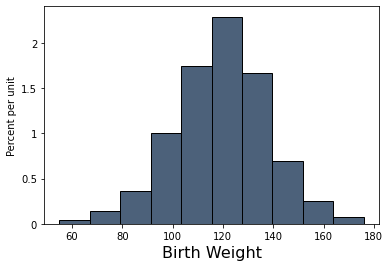

In [68]:
datascience_baby.hist('Birth Weight')

In Pandas, we use `hist()` to create histograms, just like `datascience`. Refer to the [documentation](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.hist.html) for a full list of parameters.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd7caff80d0>]],
      dtype=object)

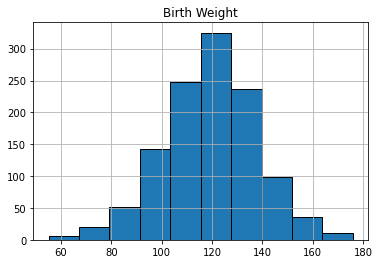

In [69]:
baby.hist('Birth Weight')

<a id='line'></a>**3.2 Line Plots**

In `datascience`, we used `plot()` to create a line plot of numerical values. In this example, we will be using census data and plot variables such as Age in a line plot.

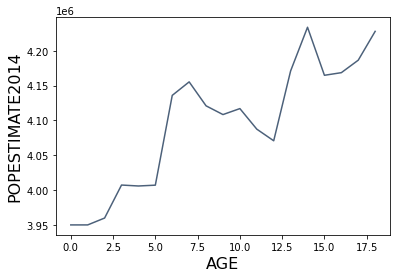

In [70]:
# Line plot in datascience
census_tbl = Table.read_table('https://raw.githubusercontent.com/mahmoudharding/ma4112/main/ldm/census.csv').select(['SEX', 'AGE', 'POPESTIMATE2014'])
children_tbl = census_tbl.where('SEX', are.equal_to(0)).where('AGE', are.below(19)).drop('SEX')
children_tbl.plot('AGE')

In Pandas, we can use `plot.line()` to create line plots. For a full list of parameters, refer to the [documentation](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.plot.line.html)

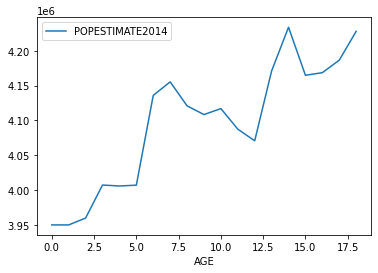

In [71]:
#Pandas
census_df = pd.read_csv('https://raw.githubusercontent.com/mahmoudharding/ma4112/main/ldm/census.csv')[["SEX", "AGE", "POPESTIMATE2014"]]
children_df = census_df[(census_df.SEX == 0) & (census_df.AGE < 19)].drop("SEX", axis=1)
children_df.plot.line(x="AGE", y="POPESTIMATE2014")

<a id='scatter'></a>**3.3 Scatter Plots**

In `datascience`, we used `scatter()` to create a scatter plot of two numerical columns.

In [73]:
football_tbl = Table.read_table('deflategate.csv')
football_tbl

Unnamed: 0,Team,Blakeman,Prioleau
0,Patriots,11.5,11.8
1,Patriots,10.85,11.2
2,Patriots,11.15,11.5
3,Patriots,10.7,11
4,Patriots,11.1,11.45
5,Patriots,11.6,11.95
6,Patriots,11.85,12.3
7,Patriots,11.1,11.55
8,Patriots,10.95,11.35
9,Patriots,10.5,10.9


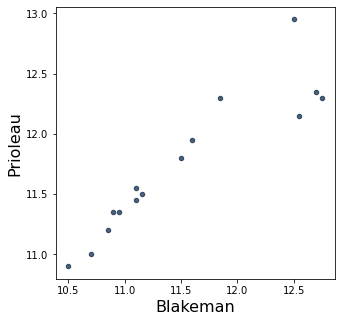

In [74]:
football_tbl.scatter('Blakeman', 'Prioleau')

In Pandas, we use `plot.scatter()` to create a scatter plot. For a full list of parameters, refer to the [documentation](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.plot.scatter.html).

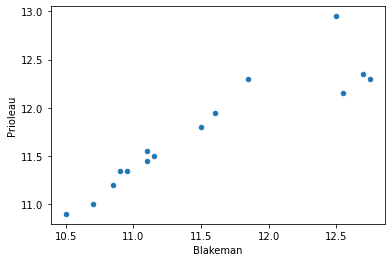

In [76]:
football_df = pd.read_csv('deflategate.csv')
football_df.plot.scatter(x = "Blakeman", y = "Prioleau");

<a id='bar'></a>**3.4 Bar Plots**

In `datascience`, we used `barh()` to create a horizontal bar plot

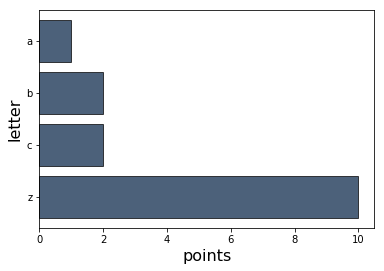

In [113]:
t.barh("letter", "points")

In Pandas, we use `plot.barh()` to create a bar chart. For a full list of parameters, refer to the [documentation](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.plot.barh.html).

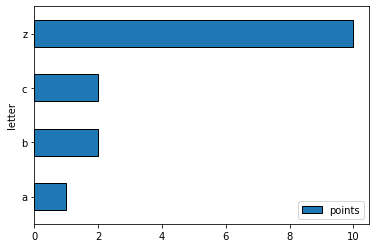

In [75]:
df_from_dict.plot.barh(x = 'letter', y = 'points');

---

## Further Reading

Here is a list of useful Pandas resources.

- [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/)
- [Dataquest Pandas Tutorial](https://www.dataquest.io/blog/pandas-python-tutorial/)
- [Pandas Cookbook](http://nbviewer.jupyter.org/github/jvns/pandas-cookbook/tree/master/cookbook/)